<a href="https://colab.research.google.com/github/EricoCoutoJr/ExemploGeoPandas/blob/master/geo_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo de Uso Simplificado do GeoPandas
### Mapa para uso em Data Science

by [Erico Couto Jr](https://www.linkedin.com/in/ericocoutojr/)



## Introdução

Foi gerado um notebook com Google Colab para teste e uso do framework GeoPandas. Neste exemplo será plotado o mapa mundi com pontos de 67 cidades por todos os continentes e será plotado linhas entre estas cidades e a Cidade de Florianópolis.

O dataframe com as cidades com as respectivas localizações geográficas estão disponíveis juntamente com este notebook.

In [6]:
import pandas as pd

url = "Cidade-Lat-Long.csv"
df = pd.read_csv(url)
print('Número de registro da tabela abaixo: {}'.format(len(df)))
# nesta linha abaixo foi removida uma coluna exitente que não será usada nos processos seguintes
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()


Número de registro da tabela abaixo: 68


,Timestamp,Home town,latitude,longitude
0,1/14/2020 9:35:38,Luzern,47.050167,8.309307
1,1/14/2020 9:49:31,"Harrah, OK",35.489500,97.163600
2,1/19/2020 13:11:33,"Brussels, Belgium",50.845539,4.355710
3,1/23/2020 7:20:16,bristol,51.454514,-2.587910
4,1/23/2020 11:35:38,CABA (Buenos Aires City),-34.609032,-58.373219


## GeoPandas

A celula abaixo processa a importação deste framework,

In [ ]:
!pip install geopandas

Em seguida é feita a importação com **_import geopandas as gpd_**

In [ ]:
import geopandas as gpd


Na celula abaixo é feita a carga do mapa mundi sem a **_Antartica_**. Não foi implementado nem um outro recurso nesta plotagem, ela serviu apenas como ilustração inicial.

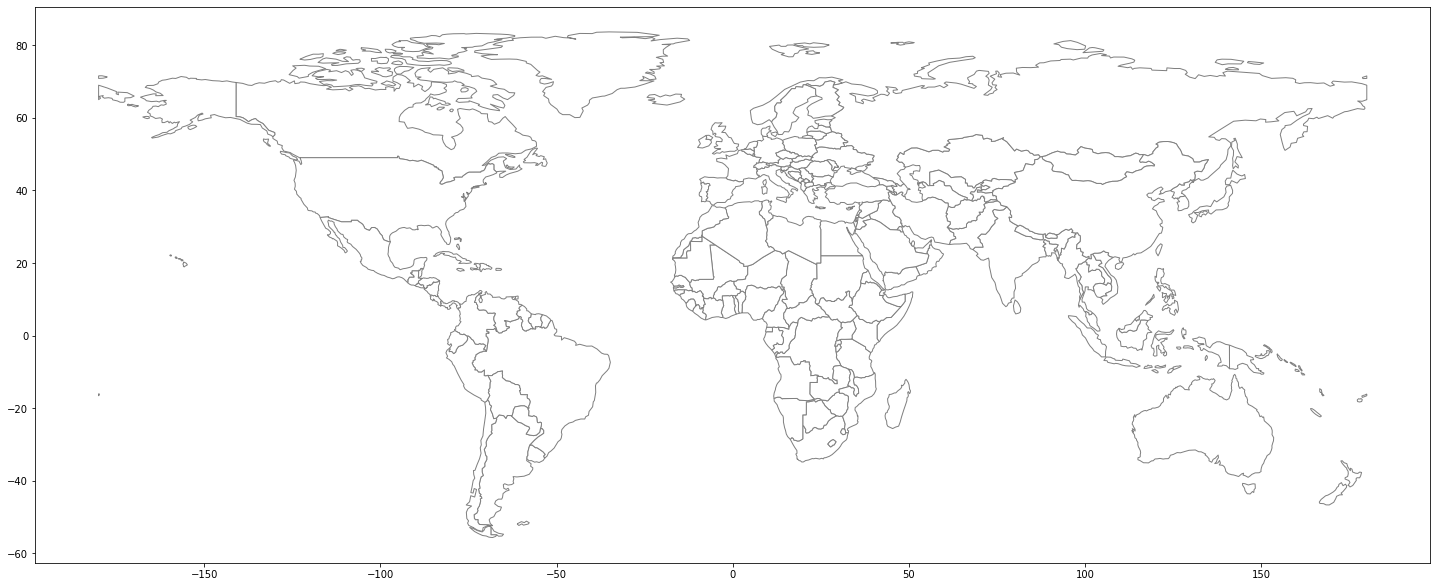

In [ ]:
%matplotlib inline

path = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(path)
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]
world.to_crs(epsg=3395)

world.plot(color='white', edgecolor='gray', figsize=(25,15));

## Construindo os elementos do mapa

Iremos usar basicamente pontos e linhas para interligar as cidades.
Abaixo é feita a importação destes das funções **_Point_** e **_LineString_**

In [ ]:
from shapely.geometry import Point, LineString

Na celula abaixo será definido o **_Point_** da cidade de _Florianópolis_ definida pelas latitude e longitude.

In [ ]:
lat = -27.5969
lon = -48.5495
fln = Point(lon, lat)

A seguir são criadas duas séries (GeoSeries) para definir as linhas (lines) e os pontos (points) das cidades listadas do dataframe (df) e inserir na lista (points) o ponto referente a cidade de Florianópolis. 
Em seguida corre do dataframe, lendo cada linha e as colunas de cada linha. Onde **_i_** é o indice (registro) e **_row_** os itens da linha.
No fim do **_loop_** os pontos e linhas são inseridos nas respectivas listas.

In [ ]:
lines = gpd.GeoSeries()
points = gpd.GeoSeries()
points['fln'] = fln

for i, row in df.iterrows():
    timestamp, name, lat, lon = row
    hometown = Point(lon, lat)
    points[name] = hometown
    lines[name] = LineString([hometown, fln])

Agora estamos prontos para plotar linhas, pontos sobre o mapa.

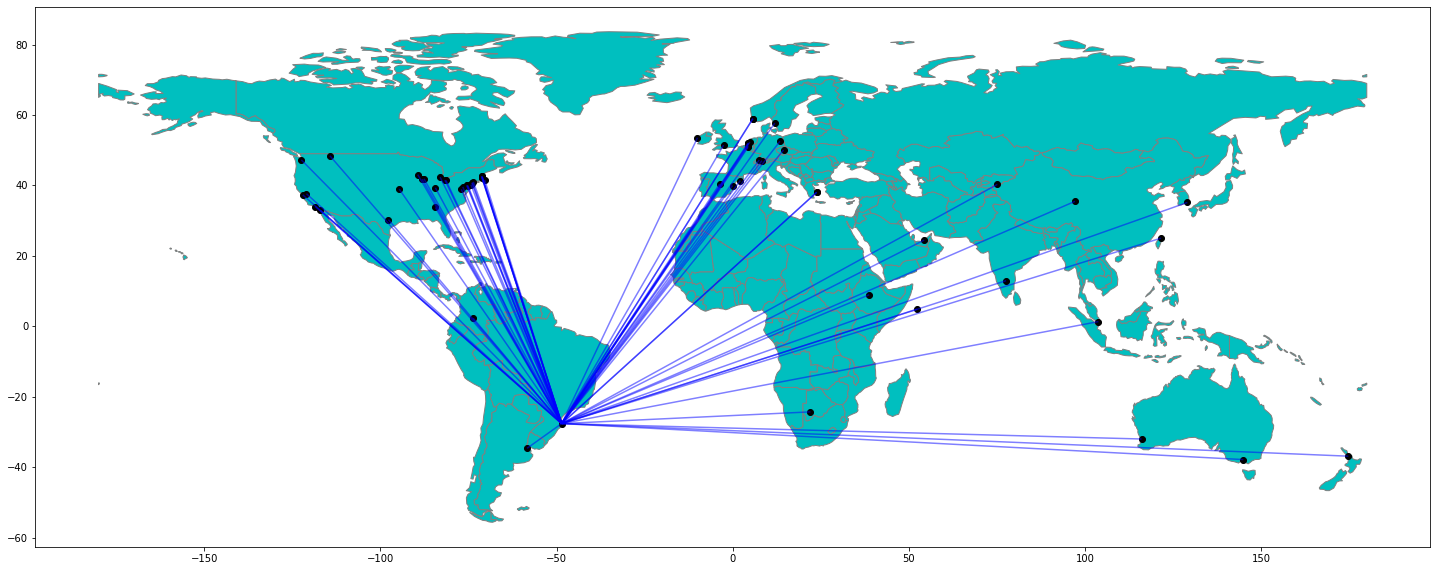

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm
plt.figure(figsize=(25, 15))
ax = plt.gca()
title_font = fm.FontProperties(family='Arial', style='normal', size=20, weight='normal', stretch='normal')
# plotando o mapa
world.plot(color='c', edgecolor='gray', ax=ax)

# plotando as linhas
lines.plot(color='blue', alpha=0.5, ax=ax)

# plotando os pontos referentes as cidades
points.plot(color='black', ax=ax);